In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import nbodykit.lab as nb
import yaml
import io

plt.style.use('light_mode')
with open("../config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)


## Import Files

In [26]:
power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/quartiles/Incremental/inc_cross_power"


dm_pk_all = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
pk_clus = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
pk_fil = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
pk_wall = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
full_pk_all = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power


power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/quartiles/Isolated/iso_cross_power"


dm_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
pk_clus_iso = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
pk_fil_iso = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
pk_wall_iso = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
full_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power

## Plot Results

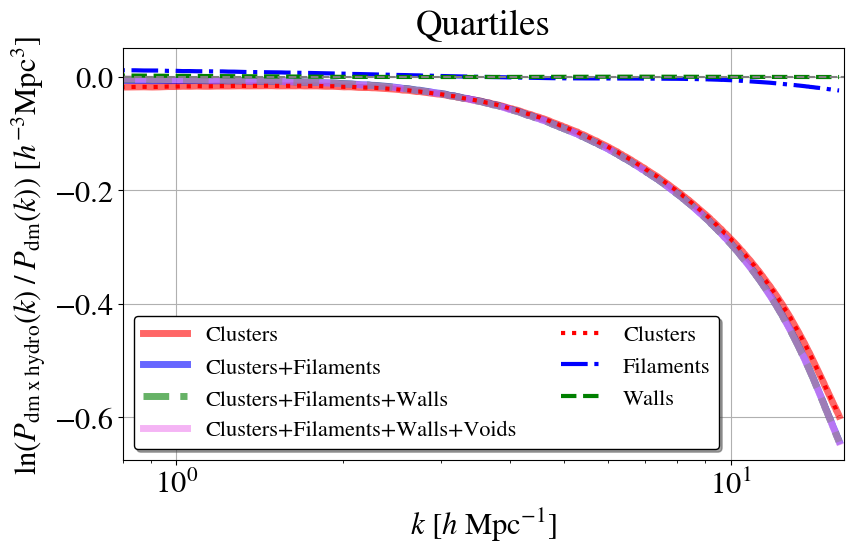

In [27]:
f, axes = plt.subplots(1,1, figsize=(9,6))


axes.plot((pk_clus['k']) * 1e3, np.log((((pk_clus['power'].real - pk_clus.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", alpha=0.6,linestyle="-", linewidth=5)

axes.plot((pk_fil['k']) * 1e3, np.log((((pk_fil['power'].real - pk_fil.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments', color="blue", alpha=0.6, linestyle="-",linewidth=5)

axes.plot((pk_wall['k']) * 1e3, np.log((((pk_wall['power'].real - pk_wall.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                        label='Clusters+Filaments+Walls', color="green", alpha=0.6, linestyle="--",linewidth=5)

axes.plot((full_pk_all['k']) * 1e3, np.log((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments+Walls+Voids', color="violet",alpha=0.6,linewidth=5) #Illustris units are kpc we need to convert to Mpc



axes.plot((pk_clus_iso['k']) * 1e3, np.log((((pk_clus_iso['power'].real - pk_clus_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", linestyle=":", linewidth=3)

axes.plot((pk_fil_iso['k']) * 1e3, np.log((((pk_fil_iso['power'].real - pk_fil_iso.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                       label='Filaments', color="blue", linestyle="-.",linewidth=3)

axes.plot((pk_wall_iso['k']) * 1e3, np.log((((pk_wall_iso['power'].real - pk_wall_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                        label='Walls', color="green", linestyle="--",linewidth=3)


axes.semilogx()
axes.grid()
axes.set_xlim(0.8e0, 1.6e1)
# axes.set_ylim(-0.8, 0.1)
axes.axhline(y = 0, color = 'gray', linestyle = '--')
# axes.set_title("Isolated Replacement")
axes.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
axes.set_ylabel(r"ln$(P_{\mathrm{dm \; x \; hydro}}(k) \; / \; P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=22)
axes.legend(fontsize=16, shadow=True, ncol=2, edgecolor="black")
axes.set_title("Quartiles", pad=10)
f.tight_layout()
# plt.savefig("final_cross_correlation_plot.png", dpi=300)

